https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-acidentes

nome: Alexsander Nogueira de Jesus
matricula: uc19107075

# Adicionando bibliotecas...

In [1]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd 
import sklearn
from sklearn.metrics  import f1_score,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier
#
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.metrics import *
from sklearn.model_selection import *
# from catboost import CatBoost,CatBoostRegressor
from xgboost import XGBRegressor,XGBRFRegressor
np.random.seed(55)
sklearn.random.seed(55)
# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# Preprocessing Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
#warn
import warnings
warnings.filterwarnings("ignore")

## Adicionando base de dados de acidentes de 2020

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
acide = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/acidentes2020.csv", sep=';', decimal=',' )

In [7]:
display(acide)

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,260068.0,578549.0,2020-01-01,quarta,05:40:00,PA,316.0,84.0,SAO FRANCISCO DO PARA,Falta de Atenção à Condução,...,Masculino,0,1,0,0,-1.310193,-47.744564,SR-PA,DEL19/1,UOP02/PA
1,260068.0,578550.0,2020-01-01,quarta,05:40:00,PA,316.0,84.0,SAO FRANCISCO DO PARA,Falta de Atenção à Condução,...,Masculino,0,1,0,0,-1.310193,-47.744564,SR-PA,DEL19/1,UOP02/PA
2,260073.0,580299.0,2020-01-01,quarta,06:00:00,MG,262.0,804.0,UBERABA,Falta de Atenção à Condução,...,Masculino,1,0,0,0,-19.767475,-47.987255,SR-MG,DEL13,UOP01/MG
3,260087.0,578794.0,2020-01-01,quarta,06:00:00,BA,116.0,191.0,CANUDOS,Condutor Dormindo,...,Masculino,0,0,0,1,-10.320021,-39.064252,SR-BA,DEL10/7,UOP02/BA
4,260116.0,578657.0,2020-01-01,quarta,10:08:00,SP,116.0,71.0,APARECIDA,Não guardar distância de segurança,...,Masculino,1,0,0,0,-22.856517,-45.231143,SR-SP,DEL6/8,UOP02/SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147637,352311.0,784912.0,2020-08-15,sábado,18:30:00,RS,116.0,156.6,CAXIAS DO SUL,Desobediência às normas de trânsito pelo condutor,...,Masculino,1,0,0,0,-29.207310,-51.177579,SR-RS,UOP01,DEL05
147638,352395.0,785081.0,2020-12-30,quarta,11:00:00,PI,343.0,20.0,PARNAIBA,Falta de Atenção à Condução,...,Masculino,0,1,0,0,-2.981128,-41.762501,SR-PI,UOP01,DEL05
147639,352395.0,785080.0,2020-12-30,quarta,11:00:00,PI,343.0,20.0,PARNAIBA,Falta de Atenção à Condução,...,Masculino,1,0,0,0,-2.981128,-41.762501,SR-PI,UOP01,DEL05
147640,352488.0,785255.0,2020-12-31,quinta,08:00:00,MA,135.0,95.0,ITAPECURU MIRIM,Falta de Atenção à Condução,...,Não Informado,0,0,0,0,-3.327972,-44.442364,SR-MA,UOP02,DEL01


#removendo colunas desnecessarias

In [8]:
acide.drop(['pesid','sentido_via','tipo_pista','uso_solo','marca','ano_fabricacao_veiculo','latitude',	'longitude',	'regional',	'delegacia',	'uop'],  inplace=True, axis=1, errors='ignore')

In [9]:
display(acide)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,id_veiculo,tipo_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos
0,260068.0,2020-01-01,quarta,05:40:00,PA,316.0,84.0,SAO FRANCISCO DO PARA,Falta de Atenção à Condução,Saída de leito carroçável,...,464176,Caminhão-trator,Condutor,Lesões Leves,38.0,Masculino,0,1,0,0
1,260068.0,2020-01-01,quarta,05:40:00,PA,316.0,84.0,SAO FRANCISCO DO PARA,Falta de Atenção à Condução,Saída de leito carroçável,...,464176,Caminhão-trator,Passageiro,Lesões Leves,14.0,Masculino,0,1,0,0
2,260073.0,2020-01-01,quarta,06:00:00,MG,262.0,804.0,UBERABA,Falta de Atenção à Condução,Colisão transversal,...,465364,Caminhão-trator,Condutor,Ileso,NaN,Masculino,1,0,0,0
3,260087.0,2020-01-01,quarta,06:00:00,BA,116.0,191.0,CANUDOS,Condutor Dormindo,Saída de leito carroçável,...,464347,Caminhão-trator,Condutor,Óbito,64.0,Masculino,0,0,0,1
4,260116.0,2020-01-01,quarta,10:08:00,SP,116.0,71.0,APARECIDA,Não guardar distância de segurança,Colisão traseira,...,464201,Caminhão,Condutor,Ileso,57.0,Masculino,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147637,352311.0,2020-08-15,sábado,18:30:00,RS,116.0,156.6,CAXIAS DO SUL,Desobediência às normas de trânsito pelo condutor,Colisão lateral,...,633801,Automóvel,Condutor,Ileso,58.0,Masculino,1,0,0,0
147638,352395.0,2020-12-30,quarta,11:00:00,PI,343.0,20.0,PARNAIBA,Falta de Atenção à Condução,Colisão transversal,...,633956,Automóvel,Condutor,Lesões Leves,19.0,Masculino,0,1,0,0
147639,352395.0,2020-12-30,quarta,11:00:00,PI,343.0,20.0,PARNAIBA,Falta de Atenção à Condução,Colisão transversal,...,633955,Automóvel,Condutor,Ileso,30.0,Masculino,1,0,0,0
147640,352488.0,2020-12-31,quinta,08:00:00,MA,135.0,95.0,ITAPECURU MIRIM,Falta de Atenção à Condução,Colisão lateral,...,634129,Caminhonete,Condutor,Não Informado,NaN,Não Informado,0,0,0,0


tipos e nomes de variaveis e os atributos com intens nulos

In [10]:
acide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147642 entries, 0 to 147641
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      147642 non-null  float64
 1   data_inversa            147642 non-null  object 
 2   dia_semana              147642 non-null  object 
 3   horario                 147642 non-null  object 
 4   uf                      147642 non-null  object 
 5   br                      147241 non-null  float64
 6   km                      147241 non-null  float64
 7   municipio               147642 non-null  object 
 8   causa_acidente          147642 non-null  object 
 9   tipo_acidente           147642 non-null  object 
 10  classificacao_acidente  147642 non-null  object 
 11  fase_dia                147642 non-null  object 
 12  condicao_metereologica  147642 non-null  object 
 13  tracado_via             147642 non-null  object 
 14  id_veiculo          

In [11]:
acide.describe()

,id,br,km,id_veiculo,idade,ilesos,feridos_leves,feridos_graves,mortos
count,147642.000000,147241.000000,147241.00000,147642.000000,132858.000000,147642.000000,147642.000000,147642.000000,147642.000000
mean,296554.833042,213.505919,263.32115,530533.379607,39.089660,0.412139,0.368208,0.115773,0.035823
std,21315.677966,131.181086,229.72905,39157.274059,41.365459,0.492222,0.482320,0.319954,0.185850
min,260031.000000,10.000000,0.00000,464097.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,277823.000000,101.000000,78.50000,496161.000000,27.000000,0.000000,0.000000,0.000000,0.000000
50%,296941.000000,163.000000,196.00000,530918.000000,37.000000,0.000000,0.000000,0.000000,0.000000
75%,314992.000000,324.000000,413.70000,564349.750000,48.000000,1.000000,1.000000,0.000000,0.000000
max,352488.000000,495.000000,1243.00000,634129.000000,2019.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
acide.isnull().sum()

id                            0
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                          401
km                          401
municipio                     0
causa_acidente                0
tipo_acidente                 0
classificacao_acidente        0
fase_dia                      0
condicao_metereologica        0
tracado_via                   0
id_veiculo                    0
tipo_veiculo                  0
tipo_envolvido                0
estado_fisico                 0
idade                     14784
sexo                          0
ilesos                        0
feridos_leves                 0
feridos_graves                0
mortos                        0
dtype: int64

In [13]:
acide.head(1000)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,id_veiculo,tipo_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos
0,260068.0,2020-01-01,quarta,05:40:00,PA,316.0,84.0,SAO FRANCISCO DO PARA,Falta de Atenção à Condução,Saída de leito carroçável,...,464176,Caminhão-trator,Condutor,Lesões Leves,38.0,Masculino,0,1,0,0
1,260068.0,2020-01-01,quarta,05:40:00,PA,316.0,84.0,SAO FRANCISCO DO PARA,Falta de Atenção à Condução,Saída de leito carroçável,...,464176,Caminhão-trator,Passageiro,Lesões Leves,14.0,Masculino,0,1,0,0
2,260073.0,2020-01-01,quarta,06:00:00,MG,262.0,804.0,UBERABA,Falta de Atenção à Condução,Colisão transversal,...,465364,Caminhão-trator,Condutor,Ileso,NaN,Masculino,1,0,0,0
3,260087.0,2020-01-01,quarta,06:00:00,BA,116.0,191.0,CANUDOS,Condutor Dormindo,Saída de leito carroçável,...,464347,Caminhão-trator,Condutor,Óbito,64.0,Masculino,0,0,0,1
4,260116.0,2020-01-01,quarta,10:08:00,SP,116.0,71.0,APARECIDA,Não guardar distância de segurança,Colisão traseira,...,464201,Caminhão,Condutor,Ileso,57.0,Masculino,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,263985.0,2020-01-20,segunda,09:00:00,PR,369.0,152.7,LONDRINA,Defeito Mecânico no Veículo,Colisão traseira,...,470919,Caminhão,Condutor,Ileso,51.0,Masculino,1,0,0,0
996,263985.0,2020-01-20,segunda,09:00:00,PR,369.0,152.7,LONDRINA,Defeito Mecânico no Veículo,Colisão traseira,...,470919,Caminhão,Passageiro,Ileso,30.0,Masculino,1,0,0,0
997,263990.0,2020-01-20,segunda,09:00:00,MG,116.0,782.5,LEOPOLDINA,Falta de Atenção à Condução,Colisão frontal,...,470892,Caminhão-trator,Condutor,Ileso,48.0,Masculino,1,0,0,0
998,263995.0,2020-01-20,segunda,08:30:00,RO,364.0,340.0,JI-PARANA,Falta de Atenção à Condução,Colisão traseira,...,471175,Caminhão,Condutor,Ileso,58.0,Masculino,1,0,0,0


In [14]:
acide.dtypes

id                        float64
data_inversa               object
dia_semana                 object
horario                    object
uf                         object
br                        float64
km                        float64
municipio                  object
causa_acidente             object
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
condicao_metereologica     object
tracado_via                object
id_veiculo                  int64
tipo_veiculo               object
tipo_envolvido             object
estado_fisico              object
idade                     float64
sexo                       object
ilesos                      int64
feridos_leves               int64
feridos_graves              int64
mortos                      int64
dtype: object

In [ ]:
tamanho = len(acide)
tamanho

In [ ]:
br= len(acide['br'].isnull())

In [ ]:
print("estadoF:",acide['estado_fisico'].value_counts() )

estadoF: Ileso            60849
Lesões Leves     54363
Lesões Graves    17093
Não Informado    10048
Óbito             5289
Name: estado_fisico, dtype: int64


In [ ]:
display(acide.br)

0         316.0
1         316.0
2         262.0
3         116.0
4         116.0
          ...  
147637    116.0
147638    343.0
147639    343.0
147640    135.0
147641    135.0
Name: br, Length: 147642, dtype: float64

In [ ]:
acide.dtypes

id                        float64
data_inversa               object
dia_semana                 object
horario                    object
uf                         object
br                        float64
km                        float64
municipio                  object
causa_acidente             object
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
condicao_metereologica     object
tracado_via                object
id_veiculo                  int64
tipo_veiculo               object
tipo_envolvido             object
estado_fisico              object
idade                     float64
sexo                       object
ilesos                      int64
feridos_leves               int64
feridos_graves              int64
mortos                      int64
dtype: object

In [ ]:
print(acide.tipo_veiculo.value_counts())
freq = acide.tipo_veiculo.value_counts()[0]

Automóvel            63914
Motocicleta          29614
Caminhonete          13160
Caminhão-trator      12862
Caminhão             11148
Camioneta             3594
Ônibus                3573
Motoneta              3219
Bicicleta             2233
Utilitário            1787
Micro-ônibus          1058
Outros                 660
Ciclomotor             453
Semireboque            135
Trator de rodas         76
Carroça-charrete        72
Reboque                 40
Triciclo                16
Não Informado            9
Carro de mão             8
Trem-bonde               4
Trator misto             3
Chassi-plataforma        2
Quadriciclo              1
Trator de esteira        1
Name: tipo_veiculo, dtype: int64


In [19]:
display(acide.br.value_counts())
freq = acide.br.value_counts()

101.0    23935
116.0    20592
381.0     7142
40.0      7110
153.0     6056
         ...  
484.0        5
422.0        3
426.0        3
477.0        2
265.0        1
Name: br, Length: 115, dtype: int64

In [20]:
br_uf=acide.groupby(['uf', 'br'], as_index=False)[['ilesos','feridos_leves','feridos_graves','mortos']].sum()

In [21]:
br_uf.head(100)

,uf,br,ilesos,feridos_leves,feridos_graves,mortos
0,AC,317.0,44,42,32,3
1,AC,364.0,201,196,63,10
2,AL,101.0,265,191,79,28
3,AL,104.0,89,110,50,13
4,AL,110.0,0,2,0,0
...,...,...,...,...,...,...
95,MS,267.0,115,108,30,21
96,MS,359.0,6,15,5,0
97,MS,376.0,7,10,4,1
98,MS,419.0,6,5,0,0


In [22]:
freq.head(20)

101.0    23935
116.0    20592
381.0     7142
40.0      7110
153.0     6056
364.0     5016
163.0     4696
277.0     4008
262.0     3996
376.0     3646
470.0     3561
282.0     2954
230.0     2834
316.0     2751
20.0      2414
60.0      2333
70.0      2274
476.0     1897
280.0     1826
222.0     1805
Name: br, dtype: int64

#Criando amostra de banco de dados para teste e analise

In [23]:
acide.br.fillna(freq, inplace=True)

In [24]:
x = (acide.uf == 'DF')& (acide.br == 20)
y = (acide.uf == 'DF')& (acide.br == 70)
acidente20 = acide[x]
acidente20['aux'] = 1 #Adicionando coluna para contagem
acidente70= acide[y]
acidente70['aux'] = 1 #Adicionando coluna para contagem

In [25]:
acidentes20_70 = pd.concat([acidente20, acidente70])

In [26]:
feridos_ac=acidentes20_70.groupby(['tipo_veiculo', 'br'], as_index=False)[['ilesos','feridos_leves','feridos_graves','mortos', 'aux']].sum()

In [27]:
display(feridos_ac)

,tipo_veiculo,br,ilesos,feridos_leves,feridos_graves,mortos,aux
0,Automóvel,20.0,263,159,34,9,491
1,Automóvel,70.0,257,85,11,3,379
2,Bicicleta,20.0,0,3,3,3,9
3,Bicicleta,70.0,0,8,1,1,11
4,Caminhonete,20.0,47,23,11,3,86
5,Caminhonete,70.0,20,3,0,0,25
6,Caminhão,20.0,31,10,2,0,46
7,Caminhão,70.0,7,3,0,0,12
8,Caminhão-trator,20.0,17,7,0,0,24
9,Caminhão-trator,70.0,5,0,0,0,6


<BarContainer object of 23 artists>

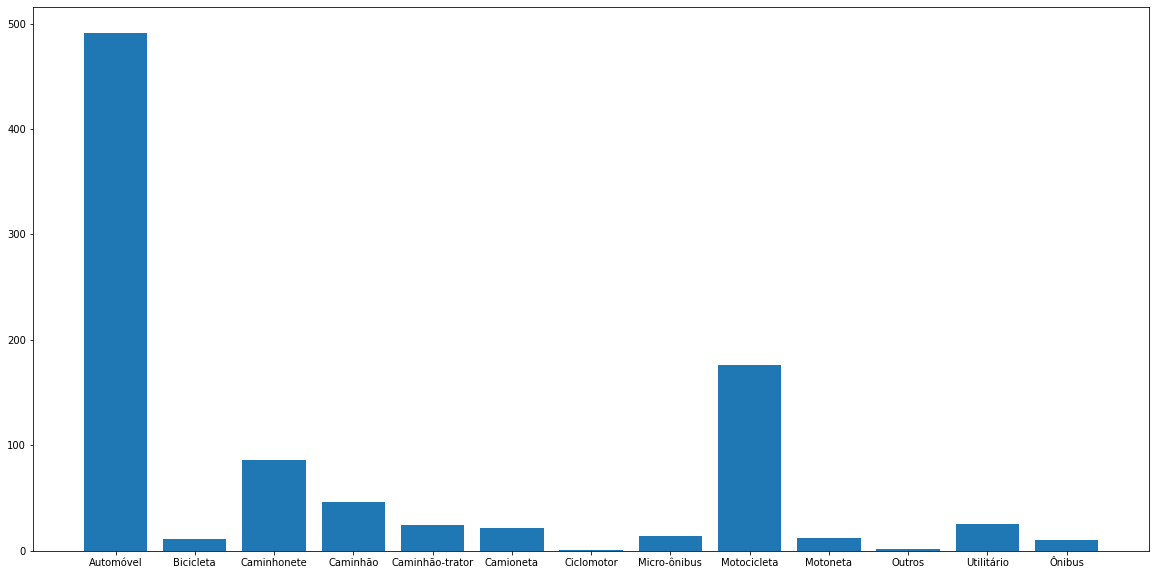

In [28]:
plt.figure(figsize=[20,10])

plt.bar(feridos_ac['tipo_veiculo'], feridos_ac['aux'])

<BarContainer object of 23 artists>

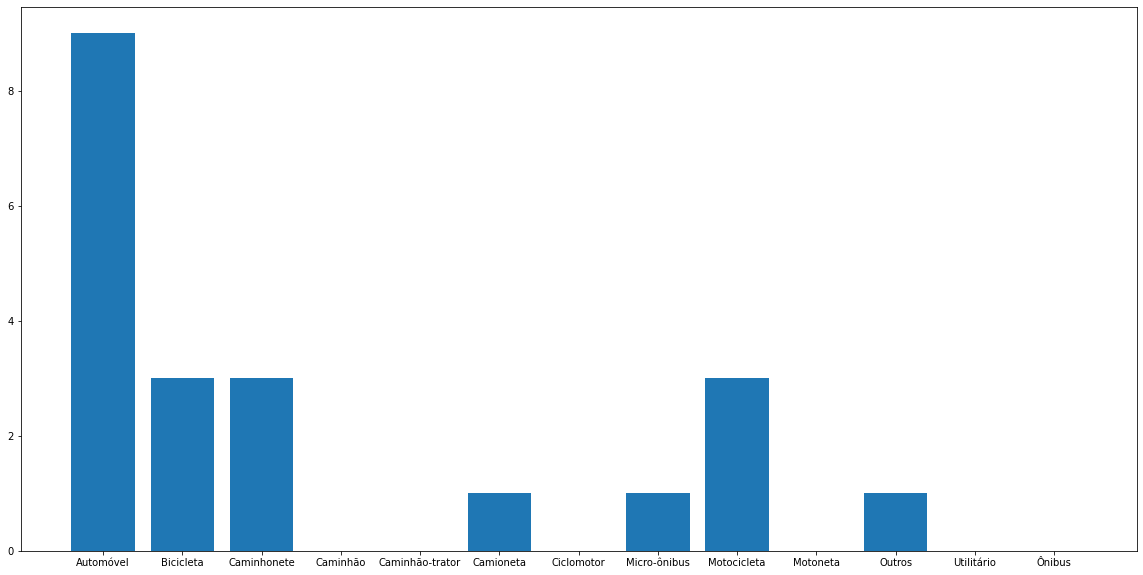

In [29]:
plt.figure(figsize=[20,10])

plt.bar(feridos_ac['tipo_veiculo'], feridos_ac['mortos'])

In [30]:
feridos_ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tipo_veiculo    23 non-null     object 
 1   br              23 non-null     float64
 2   ilesos          23 non-null     int64  
 3   feridos_leves   23 non-null     int64  
 4   feridos_graves  23 non-null     int64  
 5   mortos          23 non-null     int64  
 6   aux             23 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.4+ KB


In [31]:
from datetime import datetime

In [32]:
acidentes20_70.dtypes

id                        float64
data_inversa               object
dia_semana                 object
horario                    object
uf                         object
br                        float64
km                        float64
municipio                  object
causa_acidente             object
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
condicao_metereologica     object
tracado_via                object
id_veiculo                  int64
tipo_veiculo               object
tipo_envolvido             object
estado_fisico              object
idade                     float64
sexo                       object
ilesos                      int64
feridos_leves               int64
feridos_graves              int64
mortos                      int64
aux                         int64
dtype: object

In [33]:
display(acidentes20_70)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,tipo_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,aux
1247,264723.0,2020-01-23,quinta,23:30:00,DF,20.0,16.1,BRASILIA,Velocidade Incompatível,Saída de leito carroçável,...,Caminhão,Condutor,Ileso,46.0,Masculino,1,0,0,0,1
1248,264723.0,2020-01-23,quinta,23:30:00,DF,20.0,16.1,BRASILIA,Velocidade Incompatível,Saída de leito carroçável,...,Caminhão,Passageiro,Lesões Leves,38.0,Feminino,0,1,0,0,1
1562,265757.0,2020-01-29,quarta,07:30:00,DF,20.0,18.0,BRASILIA,Não guardar distância de segurança,Engavetamento,...,Caminhão,Condutor,Ileso,44.0,Masculino,1,0,0,0,1
1563,265757.0,2020-01-29,quarta,07:30:00,DF,20.0,18.0,BRASILIA,Não guardar distância de segurança,Engavetamento,...,Caminhão,Condutor,Ileso,32.0,Masculino,1,0,0,0,1
2810,269939.0,2020-02-17,segunda,19:00:00,DF,20.0,10.1,BRASILIA,Falta de Atenção à Condução,Colisão transversal,...,Caminhão,Condutor,Ileso,63.0,Masculino,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144527,330734.0,2020-12-26,sábado,23:15:00,DF,70.0,3.6,BRASILIA,Não guardar distância de segurança,Colisão traseira,...,Automóvel,Passageiro,Lesões Leves,29.0,Feminino,0,1,0,0,1
144528,330734.0,2020-12-26,sábado,23:15:00,DF,70.0,3.6,BRASILIA,Não guardar distância de segurança,Colisão traseira,...,Automóvel,Condutor,Ileso,44.0,Masculino,1,0,0,0,1
144529,330734.0,2020-12-26,sábado,23:15:00,DF,70.0,3.6,BRASILIA,Não guardar distância de segurança,Colisão traseira,...,Automóvel,Condutor,Ileso,20.0,Masculino,1,0,0,0,1
146976,336894.0,2020-10-21,quarta,19:10:00,DF,70.0,18.0,BRASILIA,Desobediência às normas de trânsito pelo condutor,Colisão transversal,...,Motocicleta,Condutor,Lesões Graves,34.0,Masculino,0,0,1,0,1


#corrigindo datas com datetime

In [34]:
acidentes20_70['data_inversa'] = pd.to_datetime(acidentes20_70['data_inversa'], format="%Y-%m-%d")

In [35]:

acidentes20_70['data_inversa'] = pd.to_datetime(acidentes20_70['data_inversa'] )

In [36]:
data= acidentes20_70['data_inversa']

In [37]:
acidentes20_70.drop(['data_inversa'],  inplace=True, axis=1, errors='ignore')

In [38]:
semana= acidentes20_70['dia_semana']

In [39]:
acidentes20_70.drop(['dia_semana'],  inplace=True, axis=1, errors='ignore')

In [40]:
print(data)

1247     2020-01-23
1248     2020-01-23
1562     2020-01-29
1563     2020-01-29
2810     2020-02-17
            ...    
144527   2020-12-26
144528   2020-12-26
144529   2020-12-26
146976   2020-10-21
146977   2020-10-21
Name: data_inversa, Length: 1532, dtype: datetime64[ns]


In [41]:
acidentes20_70.insert(2, "ind",1, allow_duplicates=False)

In [42]:
acidentes20_70['ind'] = acidentes20_70.index

In [43]:
display(acidentes20_70)

,id,horario,ind,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,...,tipo_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,aux
1247,264723.0,23:30:00,1247,DF,20.0,16.1,BRASILIA,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Feridas,...,Caminhão,Condutor,Ileso,46.0,Masculino,1,0,0,0,1
1248,264723.0,23:30:00,1248,DF,20.0,16.1,BRASILIA,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Feridas,...,Caminhão,Passageiro,Lesões Leves,38.0,Feminino,0,1,0,0,1
1562,265757.0,07:30:00,1562,DF,20.0,18.0,BRASILIA,Não guardar distância de segurança,Engavetamento,Sem Vítimas,...,Caminhão,Condutor,Ileso,44.0,Masculino,1,0,0,0,1
1563,265757.0,07:30:00,1563,DF,20.0,18.0,BRASILIA,Não guardar distância de segurança,Engavetamento,Sem Vítimas,...,Caminhão,Condutor,Ileso,32.0,Masculino,1,0,0,0,1
2810,269939.0,19:00:00,2810,DF,20.0,10.1,BRASILIA,Falta de Atenção à Condução,Colisão transversal,Com Vítimas Feridas,...,Caminhão,Condutor,Ileso,63.0,Masculino,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144527,330734.0,23:15:00,144527,DF,70.0,3.6,BRASILIA,Não guardar distância de segurança,Colisão traseira,Com Vítimas Feridas,...,Automóvel,Passageiro,Lesões Leves,29.0,Feminino,0,1,0,0,1
144528,330734.0,23:15:00,144528,DF,70.0,3.6,BRASILIA,Não guardar distância de segurança,Colisão traseira,Com Vítimas Feridas,...,Automóvel,Condutor,Ileso,44.0,Masculino,1,0,0,0,1
144529,330734.0,23:15:00,144529,DF,70.0,3.6,BRASILIA,Não guardar distância de segurança,Colisão traseira,Com Vítimas Feridas,...,Automóvel,Condutor,Ileso,20.0,Masculino,1,0,0,0,1
146976,336894.0,19:10:00,146976,DF,70.0,18.0,BRASILIA,Desobediência às normas de trânsito pelo condutor,Colisão transversal,Com Vítimas Feridas,...,Motocicleta,Condutor,Lesões Graves,34.0,Masculino,0,0,1,0,1


In [44]:
display(acidentes20_70)

,id,horario,ind,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,...,tipo_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,aux
1247,264723.0,23:30:00,1247,DF,20.0,16.1,BRASILIA,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Feridas,...,Caminhão,Condutor,Ileso,46.0,Masculino,1,0,0,0,1
1248,264723.0,23:30:00,1248,DF,20.0,16.1,BRASILIA,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Feridas,...,Caminhão,Passageiro,Lesões Leves,38.0,Feminino,0,1,0,0,1
1562,265757.0,07:30:00,1562,DF,20.0,18.0,BRASILIA,Não guardar distância de segurança,Engavetamento,Sem Vítimas,...,Caminhão,Condutor,Ileso,44.0,Masculino,1,0,0,0,1
1563,265757.0,07:30:00,1563,DF,20.0,18.0,BRASILIA,Não guardar distância de segurança,Engavetamento,Sem Vítimas,...,Caminhão,Condutor,Ileso,32.0,Masculino,1,0,0,0,1
2810,269939.0,19:00:00,2810,DF,20.0,10.1,BRASILIA,Falta de Atenção à Condução,Colisão transversal,Com Vítimas Feridas,...,Caminhão,Condutor,Ileso,63.0,Masculino,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144527,330734.0,23:15:00,144527,DF,70.0,3.6,BRASILIA,Não guardar distância de segurança,Colisão traseira,Com Vítimas Feridas,...,Automóvel,Passageiro,Lesões Leves,29.0,Feminino,0,1,0,0,1
144528,330734.0,23:15:00,144528,DF,70.0,3.6,BRASILIA,Não guardar distância de segurança,Colisão traseira,Com Vítimas Feridas,...,Automóvel,Condutor,Ileso,44.0,Masculino,1,0,0,0,1
144529,330734.0,23:15:00,144529,DF,70.0,3.6,BRASILIA,Não guardar distância de segurança,Colisão traseira,Com Vítimas Feridas,...,Automóvel,Condutor,Ileso,20.0,Masculino,1,0,0,0,1
146976,336894.0,19:10:00,146976,DF,70.0,18.0,BRASILIA,Desobediência às normas de trânsito pelo condutor,Colisão transversal,Com Vítimas Feridas,...,Motocicleta,Condutor,Lesões Graves,34.0,Masculino,0,0,1,0,1


In [45]:
def missing_values(df):
    # Calcula a quantidade de valores ausentes e sua porcentagem para cada recurso
    missing_percent = df.isnull().sum() * 100 / df.shape[0]
    df_missing_percent = pd.DataFrame(missing_percent).round(2)
    df_missing_percent = df_missing_percent.reset_index().rename(
                    columns={
                            'index':'Feature',
                            0:'Missing Percentage (%)'
                    }
                )
    df_missing_value = df.isnull().sum()
    df_missing_value = df_missing_value.reset_index().rename(
                    columns={
                            'index':'Feature',
                            0:'Missing Values'
                    }
                )

    Final = df_missing_value.merge(df_missing_percent, how = 'inner', left_on = 'Feature', right_on = 'Feature')
    Final = Final.sort_values(by = 'Missing Percentage (%)',ascending = False)
    return Final

missing_values(acide)

,Feature,Missing Values,Missing Percentage (%)
18,idade,14784,10.01
5,br,401,0.27
6,km,401,0.27
0,id,0,0.00
13,tracado_via,0,0.00
22,feridos_graves,0,0.00
21,feridos_leves,0,0.00
20,ilesos,0,0.00
19,sexo,0,0.00
17,estado_fisico,0,0.00


#Trabalhando Dados Faltantes

In [52]:
missing_values(acidentes20_70)

,Feature,Missing Values,Missing Percentage (%)
17,idade,107,6.98
0,id,0,0.00
14,tipo_veiculo,0,0.00
25,IDS_2,0,0.00
24,IDS_1,0,0.00
23,aux,0,0.00
22,mortos,0,0.00
21,feridos_graves,0,0.00
20,feridos_leves,0,0.00
19,ilesos,0,0.00


In [53]:
idade_Media = acidentes20_70['idade'].median()

In [54]:
type(idade_Media)

numpy.float64

In [55]:
acidentes20_70['idade'] = acidentes20_70['idade'].fillna(idade_Media)

In [56]:
missing_values(acidentes20_70)

,Feature,Missing Values,Missing Percentage (%)
0,id,0,0.0
14,tipo_veiculo,0,0.0
25,IDS_2,0,0.0
24,IDS_1,0,0.0
23,aux,0,0.0
22,mortos,0,0.0
21,feridos_graves,0,0.0
20,feridos_leves,0,0.0
19,ilesos,0,0.0
18,sexo,0,0.0


In [57]:
acidentes20_70.head()

,id,horario,ind,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,...,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,aux,IDS_1,IDS_2,IDS_3
1247,264723.0,23:30:00,1247,DF,20.0,16.1,BRASILIA,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Feridas,...,46.0,Masculino,1,0,0,0,1,2,6,4
1248,264723.0,23:30:00,1248,DF,20.0,16.1,BRASILIA,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Feridas,...,38.0,Feminino,0,1,0,0,1,2,6,4
1562,265757.0,07:30:00,1562,DF,20.0,18.0,BRASILIA,Não guardar distância de segurança,Engavetamento,Sem Vítimas,...,44.0,Masculino,1,0,0,0,1,2,6,5
1563,265757.0,07:30:00,1563,DF,20.0,18.0,BRASILIA,Não guardar distância de segurança,Engavetamento,Sem Vítimas,...,32.0,Masculino,1,0,0,0,1,2,6,5
2810,269939.0,19:00:00,2810,DF,20.0,10.1,BRASILIA,Falta de Atenção à Condução,Colisão transversal,Com Vítimas Feridas,...,63.0,Masculino,1,0,0,0,1,2,6,9


In [58]:
acidentes20_70.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 1247 to 146977
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1532 non-null   float64
 1   horario                 1532 non-null   object 
 2   ind                     1532 non-null   int64  
 3   uf                      1532 non-null   object 
 4   br                      1532 non-null   float64
 5   km                      1532 non-null   float64
 6   municipio               1532 non-null   object 
 7   causa_acidente          1532 non-null   object 
 8   tipo_acidente           1532 non-null   object 
 9   classificacao_acidente  1532 non-null   object 
 10  fase_dia                1532 non-null   object 
 11  condicao_metereologica  1532 non-null   object 
 12  tracado_via             1532 non-null   object 
 13  id_veiculo              1532 non-null   int64  
 14  tipo_veiculo            1532 non-nu

In [59]:
df_num = acidentes20_70[['id', 'br', 'km', 'idade','ilesos','feridos_leves','feridos_graves','mortos']]
df_cat = acidentes20_70[['horario',   'causa_acidente', 'tipo_acidente','classificacao_acidente','fase_dia','condicao_metereologica','tracado_via','tipo_veiculo','tipo_envolvido','estado_fisico','sexo']]

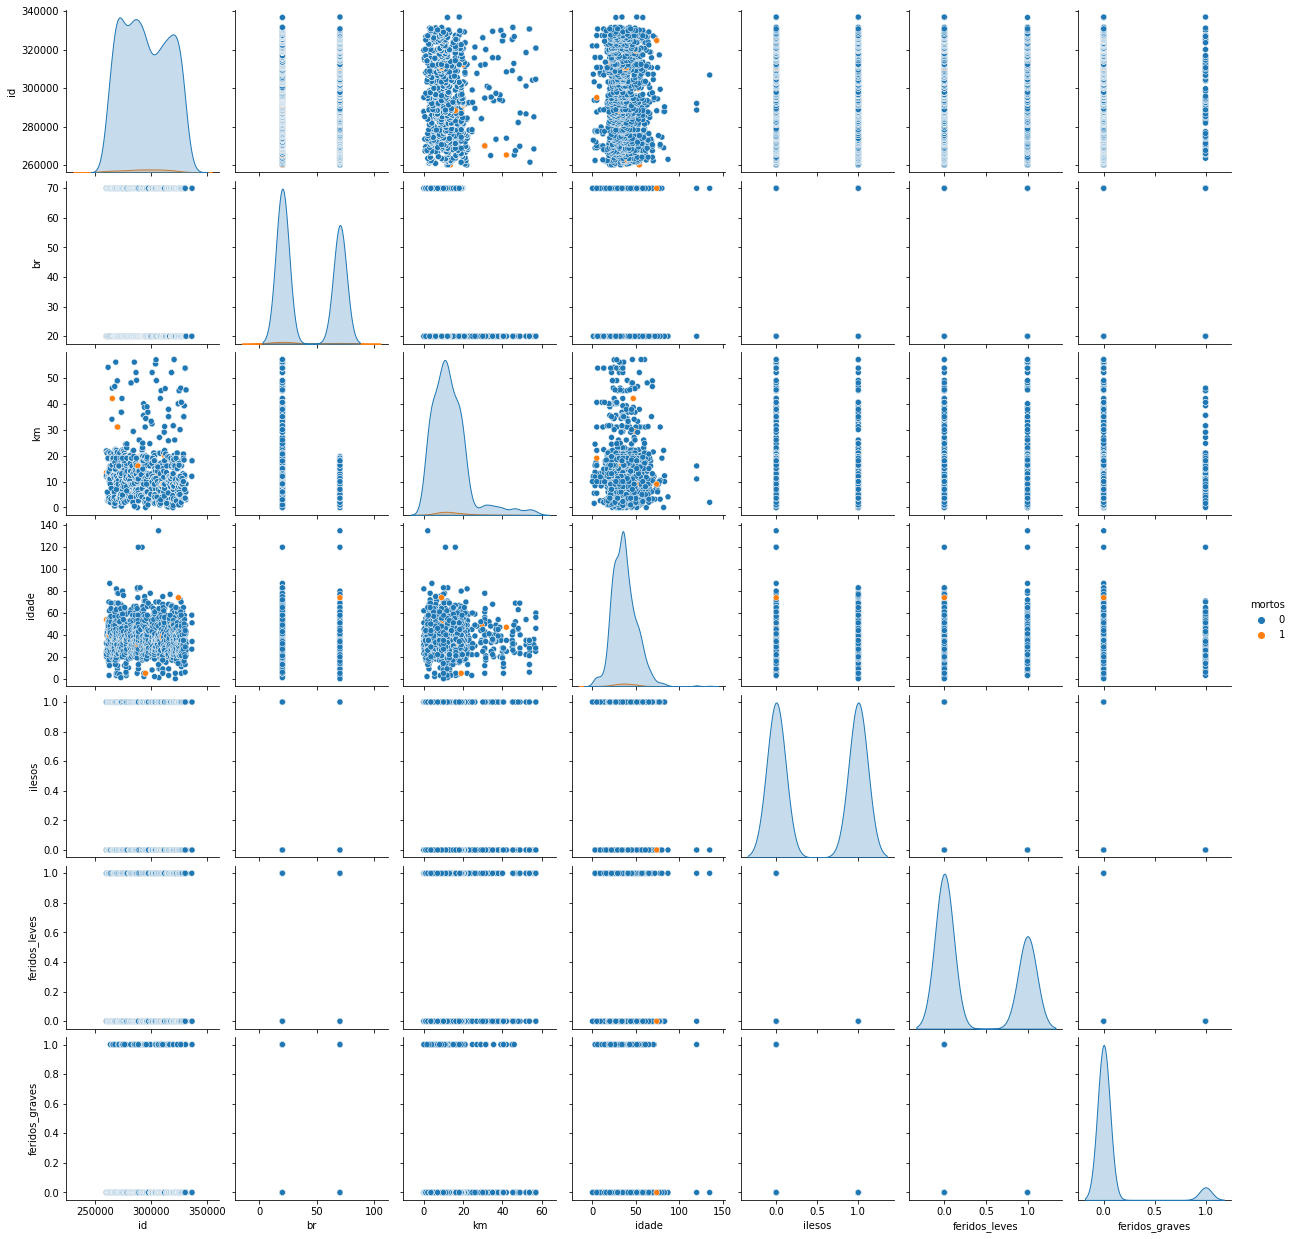

In [60]:
sns.pairplot(df_num, hue='mortos')
plt.show()

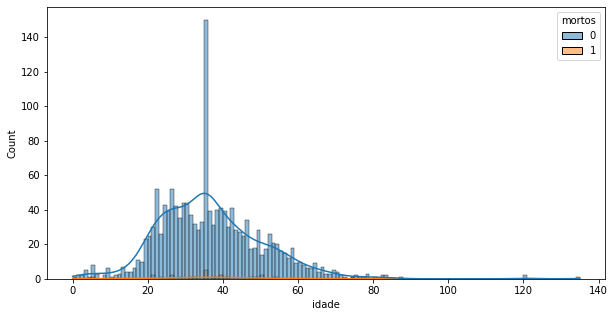

In [61]:
plt.figure(figsize=(10,5))
sns.histplot(data=acidentes20_70, x="idade", hue="mortos", binwidth=1, kde=True)

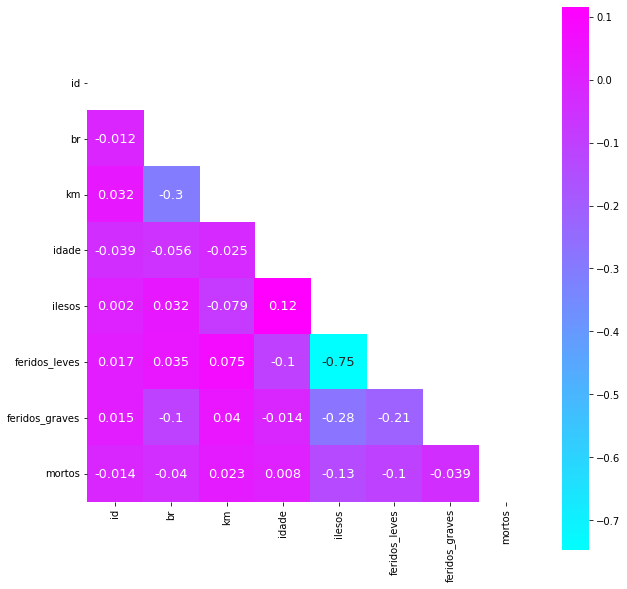

In [62]:
plt.subplots(figsize=(10,10))
mask = np.triu(np.ones_like(df_num.corr()))
sns.heatmap(df_num.corr(), mask=mask, cmap='cool', annot=True, annot_kws={"fontsize":13}, square=True)

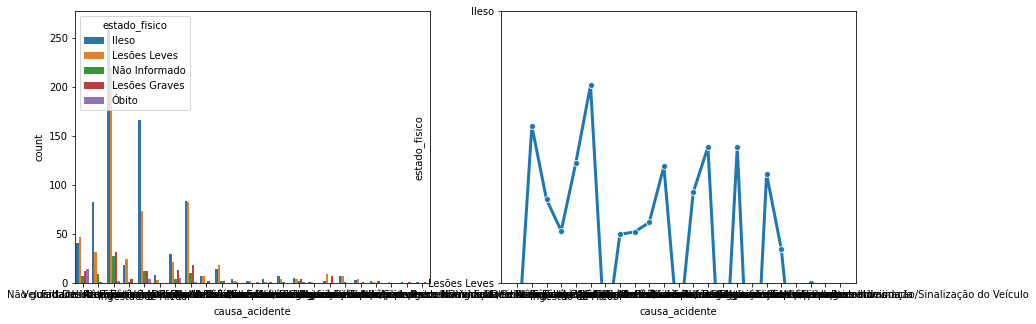

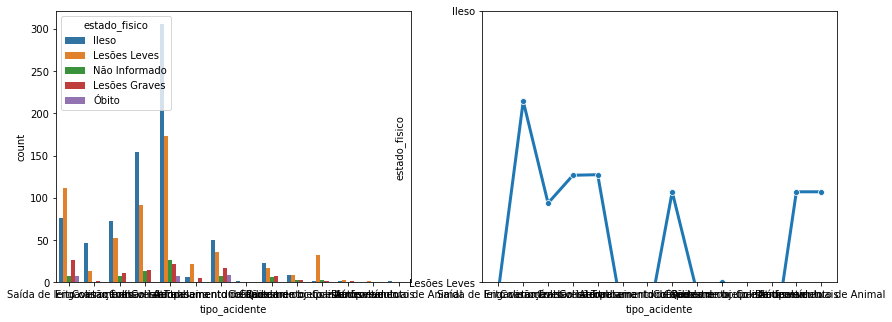

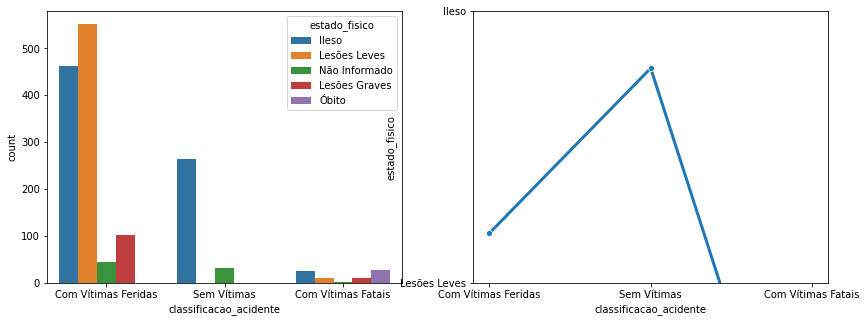

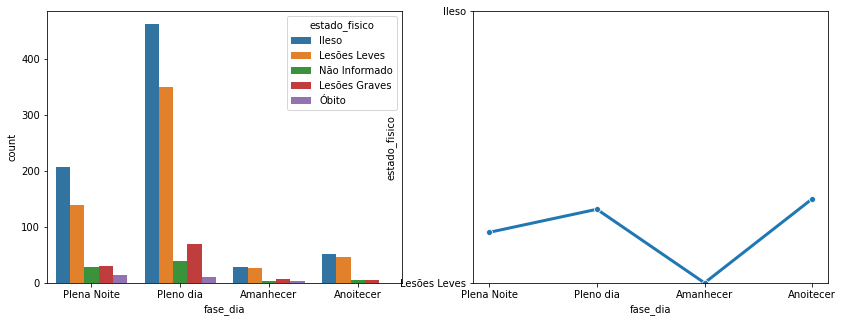

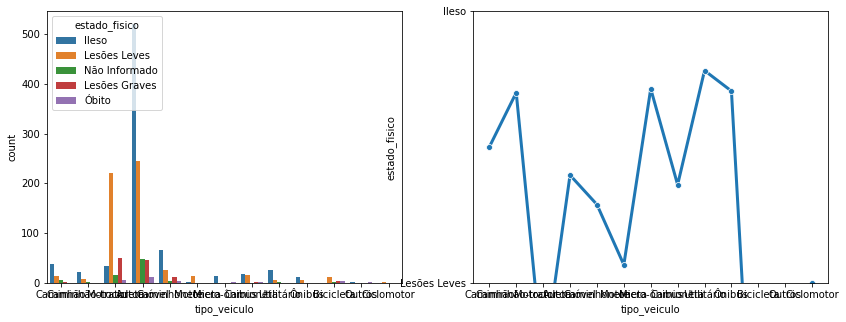

In [63]:
def Catplot(df, x, y):
    plt.subplots(1, 2, figsize = (14, 5))
    plt.subplot(1,2,1)
    sns.countplot( x=df[x].dropna(), hue=df[y])
        
    plt.subplot(1,2,2)
    plt.ylim(0,1)
    sns.lineplot( x=df[x], y=df[y], data=df, ci=None, linewidth=3, marker="o")
    plt.show()



Catplot(df_cat, 'causa_acidente', 'estado_fisico')
Catplot(df_cat, 'tipo_acidente', 'estado_fisico')
Catplot(df_cat, 'classificacao_acidente', 'estado_fisico')
Catplot(df_cat, 'fase_dia', 'estado_fisico')
Catplot(df_cat, 'tipo_veiculo', 'estado_fisico')



#Dividindo dataframe

In [64]:
y = acidentes20_70['mortos']
X = acidentes20_70.drop(['ilesos','feridos_leves','feridos_graves','mortos','estado_fisico',], axis = "columns")


In [109]:
X.isnull().sum()

id                           0
horario                      0
ind                          0
uf                           0
br                           0
                            ..
tipo_envolvido_Testemunha    0
sexo_Feminino                0
sexo_Ignorado                0
sexo_Masculino               0
sexo_Não Informado           0
Length: 102, dtype: int64

In [107]:
X.head()

,id,horario,ind,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,...,tipo_veiculo_Utilitário,tipo_veiculo_Ônibus,tipo_envolvido_Condutor,tipo_envolvido_Passageiro,tipo_envolvido_Pedestre,tipo_envolvido_Testemunha,sexo_Feminino,sexo_Ignorado,sexo_Masculino,sexo_Não Informado
1247,264723.0,23:30:00,1247,DF,20.0,16.1,BRASILIA,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Feridas,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1248,264723.0,23:30:00,1248,DF,20.0,16.1,BRASILIA,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Feridas,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1562,265757.0,07:30:00,1562,DF,20.0,18.0,BRASILIA,Não guardar distância de segurança,Engavetamento,Sem Vítimas,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1563,265757.0,07:30:00,1563,DF,20.0,18.0,BRASILIA,Não guardar distância de segurança,Engavetamento,Sem Vítimas,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2810,269939.0,19:00:00,2810,DF,20.0,10.1,BRASILIA,Falta de Atenção à Condução,Colisão transversal,Com Vítimas Feridas,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [108]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 1247 to 146977
Columns: 102 entries, id to sexo_Não Informado
dtypes: float64(84), int64(4), object(14)
memory usage: 1.2+ MB


In [68]:
print("type(X): {}\ntype(y): {}".format(type(X), type(y)))

type(X): <class 'pandas.core.frame.DataFrame'>
type(y): <class 'pandas.core.series.Series'>


In [69]:
x.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,)

In [71]:
print("Shape do conjunto de treinamento: {}\n\
Shape do conjunto de teste {}".format(X_train.shape, X_test.shape))

Shape do conjunto de treinamento: (1072, 22)
Shape do conjunto de teste (460, 22)


In [72]:
print("Shape do conjunto de treinamento: {}\n\
Shape do conjunto de teste {}".format(y_train.shape, y_test.shape))

Shape do conjunto de treinamento: (1072,)
Shape do conjunto de teste (460,)


In [73]:
y_train.value_counts()

0    1052
1      20
Name: mortos, dtype: int64

In [74]:
y_test.value_counts()

0    452
1      8
Name: mortos, dtype: int64

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
knn = KNeighborsClassifier(n_neighbors = 1)

knn

KNeighborsClassifier(n_neighbors=1)

In [77]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 1247 to 146977
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   horario                 1532 non-null   object
 1   causa_acidente          1532 non-null   object
 2   tipo_acidente           1532 non-null   object
 3   classificacao_acidente  1532 non-null   object
 4   fase_dia                1532 non-null   object
 5   condicao_metereologica  1532 non-null   object
 6   tracado_via             1532 non-null   object
 7   tipo_veiculo            1532 non-null   object
 8   tipo_envolvido          1532 non-null   object
 9   estado_fisico           1532 non-null   object
 10  sexo                    1532 non-null   object
dtypes: object(11)
memory usage: 175.9+ KB


In [78]:
from sklearn.preprocessing import OneHotEncoder

In [79]:
encoder_transformer_str = make_column_transformer(
    (OneHotEncoder(), ['causa_acidente', 'tipo_acidente','classificacao_acidente','fase_dia','condicao_metereologica','tracado_via','tipo_veiculo','tipo_envolvido','sexo']) 
)

encoder_transformer_str.fit(X)

one_hot_str = encoder_transformer_str.transform(X)
one_hot_str_test = encoder_transformer_str.transform(X_test)

In [80]:
one_hot_str[:5]

<5x80 sparse matrix of type '<class 'numpy.float64'>'
	with 45 stored elements in Compressed Sparse Row format>

In [81]:
one_hot_str = one_hot_str.todense()
one_hot_str_test = one_hot_str_test.todense()

In [82]:
one_hot_str[:5]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 

In [83]:
novas_colunas_str = list(encoder_transformer_str.named_transformers_['onehotencoder'].get_feature_names(['causa_acidente', 'tipo_acidente','classificacao_acidente','fase_dia','condicao_metereologica','tracado_via','tipo_veiculo','tipo_envolvido','sexo']))
novas_colunas_str

['causa_acidente_Agressão Externa',
 'causa_acidente_Animais na Pista',
 'causa_acidente_Avarias e/ou desgaste excessivo no pneu',
 'causa_acidente_Carga excessiva e/ou mal acondicionada',
 'causa_acidente_Condutor Dormindo',
 'causa_acidente_Defeito Mecânico no Veículo',
 'causa_acidente_Defeito na Via',
 'causa_acidente_Deficiência ou não Acionamento do Sistema de Iluminação/Sinalização do Veículo',
 'causa_acidente_Desobediência às normas de trânsito pelo condutor',
 'causa_acidente_Desobediência às normas de trânsito pelo pedestre',
 'causa_acidente_Falta de Atenção do Pedestre',
 'causa_acidente_Falta de Atenção à Condução',
 'causa_acidente_Fenômenos da Natureza',
 'causa_acidente_Ingestão de Substâncias Psicoativas',
 'causa_acidente_Ingestão de Álcool',
 'causa_acidente_Ingestão de álcool e/ou substâncias psicoativas pelo pedestre',
 'causa_acidente_Mal Súbito',
 'causa_acidente_Não guardar distância de segurança',
 'causa_acidente_Objeto estático sobre o leito carroçável',
 'c

In [84]:
for i in range(len(novas_colunas_str)):
  X[novas_colunas_str[i]] =  one_hot_str[:,i]
  X_test[novas_colunas_str[i]] =  one_hot_str_test[:,i]

In [85]:
X.head()

,id,horario,ind,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,...,tipo_veiculo_Utilitário,tipo_veiculo_Ônibus,tipo_envolvido_Condutor,tipo_envolvido_Passageiro,tipo_envolvido_Pedestre,tipo_envolvido_Testemunha,sexo_Feminino,sexo_Ignorado,sexo_Masculino,sexo_Não Informado
1247,264723.0,23:30:00,1247,DF,20.0,16.1,BRASILIA,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Feridas,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1248,264723.0,23:30:00,1248,DF,20.0,16.1,BRASILIA,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Feridas,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1562,265757.0,07:30:00,1562,DF,20.0,18.0,BRASILIA,Não guardar distância de segurança,Engavetamento,Sem Vítimas,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1563,265757.0,07:30:00,1563,DF,20.0,18.0,BRASILIA,Não guardar distância de segurança,Engavetamento,Sem Vítimas,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2810,269939.0,19:00:00,2810,DF,20.0,10.1,BRASILIA,Falta de Atenção à Condução,Colisão transversal,Com Vítimas Feridas,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [86]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 1247 to 146977
Columns: 102 entries, id to sexo_Não Informado
dtypes: float64(84), int64(4), object(14)
memory usage: 1.2+ MB


In [87]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 40516 to 42307
Columns: 102 entries, id to sexo_Não Informado
dtypes: float64(84), int64(4), object(14)
memory usage: 370.2+ KB


In [88]:
X.columns

Index(['id', 'horario', 'ind', 'uf', 'br', 'km', 'municipio', 'causa_acidente',
       'tipo_acidente', 'classificacao_acidente',
       ...
       'tipo_veiculo_Utilitário', 'tipo_veiculo_Ônibus',
       'tipo_envolvido_Condutor', 'tipo_envolvido_Passageiro',
       'tipo_envolvido_Pedestre', 'tipo_envolvido_Testemunha', 'sexo_Feminino',
       'sexo_Ignorado', 'sexo_Masculino', 'sexo_Não Informado'],
      dtype='object', length=102)

In [89]:
uteis = ['id', 'causa_acidente_Agressão Externa',
 'causa_acidente_Animais na Pista',
 'causa_acidente_Avarias e/ou desgaste excessivo no pneu',
 'causa_acidente_Carga excessiva e/ou mal acondicionada',
 'causa_acidente_Condutor Dormindo',
 'causa_acidente_Defeito Mecânico no Veículo',
 'causa_acidente_Defeito na Via',
 'causa_acidente_Deficiência ou não Acionamento do Sistema de Iluminação/Sinalização do Veículo',
 'causa_acidente_Desobediência às normas de trânsito pelo condutor',
 'causa_acidente_Desobediência às normas de trânsito pelo pedestre',
 'causa_acidente_Falta de Atenção do Pedestre',
 'causa_acidente_Falta de Atenção à Condução',
 'causa_acidente_Fenômenos da Natureza',
 'causa_acidente_Ingestão de Substâncias Psicoativas',
 'causa_acidente_Ingestão de Álcool',
 'causa_acidente_Ingestão de álcool e/ou substâncias psicoativas pelo pedestre',
 'causa_acidente_Mal Súbito',
 'causa_acidente_Não guardar distância de segurança',
 'causa_acidente_Objeto estático sobre o leito carroçável',
 'causa_acidente_Pista Escorregadia',
 'causa_acidente_Restrição de Visibilidade',
 'causa_acidente_Ultrapassagem Indevida',
 'causa_acidente_Velocidade Incompatível',
 'tipo_acidente_Atropelamento de Animal',
 'tipo_acidente_Atropelamento de Pedestre',
 'tipo_acidente_Capotamento',
 'tipo_acidente_Colisão com objeto estático',
 'tipo_acidente_Colisão frontal',
 'tipo_acidente_Colisão lateral',
 'tipo_acidente_Colisão transversal',
 'tipo_acidente_Colisão traseira',
 'tipo_acidente_Danos eventuais',
 'tipo_acidente_Engavetamento',
 'tipo_acidente_Incêndio',
 'tipo_acidente_Queda de ocupante de veículo',
 'tipo_acidente_Saída de leito carroçável',
 'tipo_acidente_Tombamento',
 'classificacao_acidente_Com Vítimas Fatais',
 'classificacao_acidente_Com Vítimas Feridas',
 'classificacao_acidente_Sem Vítimas',
 'fase_dia_Amanhecer',
 'fase_dia_Anoitecer',
 'fase_dia_Plena Noite',
 'fase_dia_Pleno dia',
 'condicao_metereologica_Chuva',
 'condicao_metereologica_Céu Claro',
 'condicao_metereologica_Garoa/Chuvisco',
 'condicao_metereologica_Ignorado',
 'condicao_metereologica_Nevoeiro/Neblina',
 'condicao_metereologica_Nublado',
 'condicao_metereologica_Sol',
 'tracado_via_Curva',
 'tracado_via_Desvio Temporário',
 'tracado_via_Interseção de vias',
 'tracado_via_Não Informado',
 'tracado_via_Ponte',
 'tracado_via_Reta',
 'tracado_via_Retorno Regulamentado',
 'tracado_via_Rotatória',
 'tipo_veiculo_Automóvel',
 'tipo_veiculo_Bicicleta',
 'tipo_veiculo_Caminhonete',
 'tipo_veiculo_Caminhão',
 'tipo_veiculo_Caminhão-trator',
 'tipo_veiculo_Camioneta',
 'tipo_veiculo_Ciclomotor',
 'tipo_veiculo_Micro-ônibus',
 'tipo_veiculo_Motocicleta',
 'tipo_veiculo_Motoneta',
 'tipo_veiculo_Outros',
 'tipo_veiculo_Utilitário',
 'tipo_veiculo_Ônibus',
 'tipo_envolvido_Condutor',
 'tipo_envolvido_Passageiro',
 'tipo_envolvido_Pedestre',
 'tipo_envolvido_Testemunha',
 'sexo_Feminino',
 'sexo_Ignorado',
 'sexo_Masculino',
 'sexo_Não Informado'
 ]

#Separando a base de treinamento

In [90]:
X_train = X[uteis]

In [91]:
X_train.head()

,id,causa_acidente_Agressão Externa,causa_acidente_Animais na Pista,causa_acidente_Avarias e/ou desgaste excessivo no pneu,causa_acidente_Carga excessiva e/ou mal acondicionada,causa_acidente_Condutor Dormindo,causa_acidente_Defeito Mecânico no Veículo,causa_acidente_Defeito na Via,causa_acidente_Deficiência ou não Acionamento do Sistema de Iluminação/Sinalização do Veículo,causa_acidente_Desobediência às normas de trânsito pelo condutor,...,tipo_veiculo_Utilitário,tipo_veiculo_Ônibus,tipo_envolvido_Condutor,tipo_envolvido_Passageiro,tipo_envolvido_Pedestre,tipo_envolvido_Testemunha,sexo_Feminino,sexo_Ignorado,sexo_Masculino,sexo_Não Informado
1247,264723.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1248,264723.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1562,265757.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1563,265757.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2810,269939.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [92]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 1247 to 146977
Data columns (total 81 columns):
 #   Column                                                                                         Non-Null Count  Dtype  
---  ------                                                                                         --------------  -----  
 0   id                                                                                             1532 non-null   float64
 1   causa_acidente_Agressão Externa                                                                1532 non-null   float64
 2   causa_acidente_Animais na Pista                                                                1532 non-null   float64
 3   causa_acidente_Avarias e/ou desgaste excessivo no pneu                                         1532 non-null   float64
 4   causa_acidente_Carga excessiva e/ou mal acondicionada                                          1532 non-null   float64
 5   causa_acidente_

In [93]:
from sklearn.model_selection import cross_val_score

#Common Model Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Definindo uma lista de algoritmos de aprendizado de máquina que executaremos
MLA = [
    LogisticRegression(max_iter = 2000),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    LGBMClassifier(),
]

row_index = 0

# Configurando a tabela para comparar os desempenhos de cada modelo
MLA_cols = ['Model', 'Accuracy']
MLA_compare = pd.DataFrame(columns = MLA_cols)

# Iterate and store scores in the table
for model in MLA:
    MLA_compare.loc[row_index, 'Model'] = model.__class__.__name__
    cv_results = cross_val_score(model, X_train, y, cv=100, scoring='accuracy')
    MLA_compare.loc[row_index, 'Accuracy'] = cv_results.mean()
    
    row_index+=1

# Present table
MLA_compare.sort_values(by=['Accuracy'], ascending=False, inplace=True)
MLA_compare

,Model,Accuracy
0,LogisticRegression,0.9825
1,SVC,0.9825
5,XGBClassifier,0.979542
2,KNeighborsClassifier,0.9785
6,LGBMClassifier,0.978042
4,RandomForestClassifier,0.977625
3,DecisionTreeClassifier,0.977417


In [94]:
modelo = DecisionTreeClassifier().fit(X_train,y)

predic = modelo.predict(X_test[uteis])

In [95]:
predic[:1532]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [96]:
len(predic)

460

In [97]:
X_train.head()

,id,causa_acidente_Agressão Externa,causa_acidente_Animais na Pista,causa_acidente_Avarias e/ou desgaste excessivo no pneu,causa_acidente_Carga excessiva e/ou mal acondicionada,causa_acidente_Condutor Dormindo,causa_acidente_Defeito Mecânico no Veículo,causa_acidente_Defeito na Via,causa_acidente_Deficiência ou não Acionamento do Sistema de Iluminação/Sinalização do Veículo,causa_acidente_Desobediência às normas de trânsito pelo condutor,...,tipo_veiculo_Utilitário,tipo_veiculo_Ônibus,tipo_envolvido_Condutor,tipo_envolvido_Passageiro,tipo_envolvido_Pedestre,tipo_envolvido_Testemunha,sexo_Feminino,sexo_Ignorado,sexo_Masculino,sexo_Não Informado
1247,264723.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1248,264723.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1562,265757.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1563,265757.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2810,269939.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
knn = KNeighborsClassifier(n_neighbors = 1)

knn

KNeighborsClassifier(n_neighbors=1)

In [100]:
knn.fit(X_train,y)

KNeighborsClassifier(n_neighbors=1)

In [101]:
y_pred = knn.predict(X_train)


In [102]:
print(y_pred)

[0 0 0 ... 0 0 0]


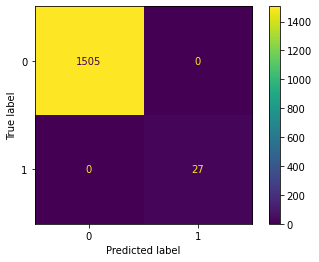

In [103]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(
    estimator = knn,
    X = X_train,
    y_true = y_pred
)

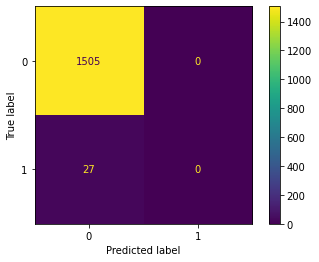

In [104]:
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy = 'most_frequent')

trained_dummy_classifier = dummy_classifier.fit(X_train, y)

y_dummy_pred = dummy_classifier.predict(X_train)

plot_confusion_matrix(
    estimator = trained_dummy_classifier,
    X = X_train,
    y_true = y_pred
)

#Gerando resultado final

In [105]:
acidentes20_70.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 1247 to 146977
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1532 non-null   float64
 1   horario                 1532 non-null   object 
 2   ind                     1532 non-null   int64  
 3   uf                      1532 non-null   object 
 4   br                      1532 non-null   float64
 5   km                      1532 non-null   float64
 6   municipio               1532 non-null   object 
 7   causa_acidente          1532 non-null   object 
 8   tipo_acidente           1532 non-null   object 
 9   classificacao_acidente  1532 non-null   object 
 10  fase_dia                1532 non-null   object 
 11  condicao_metereologica  1532 non-null   object 
 12  tracado_via             1532 non-null   object 
 13  id_veiculo              1532 non-null   int64  
 14  tipo_veiculo            1532 non-nu

In [106]:
result_final = pd.DataFrame(X_train['id'],columns=['id'])

In [ ]:
result_final.head(14000)

,id
1247,264723.0
1248,264723.0
1562,265757.0
1563,265757.0
2810,269939.0
...,...
144527,330734.0
144528,330734.0
144529,330734.0
146976,336894.0


In [ ]:
print(result_final)

              id
1247    264723.0
1248    264723.0
1562    265757.0
1563    265757.0
2810    269939.0
...          ...
144527  330734.0
144528  330734.0
144529  330734.0
146976  336894.0
146977  336894.0

[1532 rows x 1 columns]


In [ ]:
print(predic)

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
acidentes20_70.head(10)

,id,horario,ind,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,...,tipo_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,aux
1247,264723.0,23:30:00,1247,DF,20.0,16.1,BRASILIA,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Feridas,...,Caminhão,Condutor,Ileso,46.0,Masculino,1,0,0,0,1
1248,264723.0,23:30:00,1248,DF,20.0,16.1,BRASILIA,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Feridas,...,Caminhão,Passageiro,Lesões Leves,38.0,Feminino,0,1,0,0,1
1562,265757.0,07:30:00,1562,DF,20.0,18.0,BRASILIA,Não guardar distância de segurança,Engavetamento,Sem Vítimas,...,Caminhão,Condutor,Ileso,44.0,Masculino,1,0,0,0,1
1563,265757.0,07:30:00,1563,DF,20.0,18.0,BRASILIA,Não guardar distância de segurança,Engavetamento,Sem Vítimas,...,Caminhão,Condutor,Ileso,32.0,Masculino,1,0,0,0,1
2810,269939.0,19:00:00,2810,DF,20.0,10.1,BRASILIA,Falta de Atenção à Condução,Colisão transversal,Com Vítimas Feridas,...,Caminhão,Condutor,Ileso,63.0,Masculino,1,0,0,0,1
2966,270433.0,11:15:00,2966,DF,20.0,10.2,BRASILIA,Falta de Atenção à Condução,Colisão lateral,Com Vítimas Feridas,...,Caminhão,Condutor,Ileso,33.0,Masculino,1,0,0,0,1
3290,271583.0,12:30:00,3290,DF,20.0,17.8,BRASILIA,Pista Escorregadia,Saída de leito carroçável,Com Vítimas Feridas,...,Caminhão,Passageiro,Lesões Leves,66.0,Masculino,0,1,0,0,1
3291,271583.0,12:30:00,3291,DF,20.0,17.8,BRASILIA,Pista Escorregadia,Saída de leito carroçável,Com Vítimas Feridas,...,Caminhão,Condutor,Lesões Leves,35.0,Masculino,0,1,0,0,1
3323,271772.0,08:00:00,3323,DF,20.0,18.0,BRASILIA,Ingestão de Álcool,Colisão traseira,Sem Vítimas,...,Caminhão-trator,Condutor,Ileso,46.0,Masculino,1,0,0,0,1
3324,271772.0,08:00:00,3324,DF,20.0,18.0,BRASILIA,Ingestão de Álcool,Colisão traseira,Sem Vítimas,...,Caminhão,Condutor,Ileso,67.0,Masculino,1,0,0,0,1


In [ ]:
mortes= predic

In [ ]:
column_names = ["mortes"]

In [ ]:
data_df = pd.DataFrame(predic, columns=column_names)

In [ ]:
print(data_df)

     mortes
0         0
1         0
2         0
3         0
4         0
..      ...
455       0
456       0
457       0
458       0
459       0

[460 rows x 1 columns]


In [ ]:
print(data_df['mortes'].sum())

7


In [ ]:
result_final.reset_index(inplace=True, drop=True)

In [ ]:
y.reset_index(inplace=True, drop=True)

In [ ]:
print(result_final)

            id
0     264723.0
1     264723.0
2     265757.0
3     265757.0
4     269939.0
...        ...
1527  330734.0
1528  330734.0
1529  330734.0
1530  336894.0
1531  336894.0

[1532 rows x 1 columns]


In [ ]:
resultado_final = pd.concat([result_final, data_df], axis=1)

In [ ]:
resultado_final['mortes'] = resultado_final['mortes'].astype(bool)

In [ ]:
print(resultado_final)

            id  mortes
0     264723.0   False
1     264723.0   False
2     265757.0   False
3     265757.0   False
4     269939.0   False
...        ...     ...
1527  330734.0    True
1528  330734.0    True
1529  330734.0    True
1530  336894.0    True
1531  336894.0    True

[1532 rows x 2 columns]


In [ ]:
resultado_final.head(300)

,id,mortes
0,264723.0,False
1,264723.0,False
2,265757.0,False
3,265757.0,False
4,269939.0,False
...,...,...
295,280139.0,False
296,280139.0,False
297,280564.0,False
298,280564.0,False
